In [15]:
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df_gun_data = pd.read_csv(
    "gun.csv",
    index_col="Incident ID")

df_gun_data.head(10)

,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations
Incident ID,,,,,,,,,,
3014703,"September 4, 2024",Georgia,Winder,940 Haymon Morris Rd,4,9,0,0,1,NaN
3012631,"September 2, 2024",Illinois,Forest Park,711 Desplaines Ave,4,0,0,0,1,NaN
3012888,"September 2, 2024",New York,Brooklyn,Eastern Pkwy and Classon Ave,1,4,0,0,0,NaN
3013744,"September 2, 2024",Washington,Federal Way,I-5 and S 320th St,0,5,0,0,1,NaN
3013319,"September 2, 2024",Alabama,Bessemer,200 Fourth Ave N,0,4,0,0,0,NaN
3013409,"September 2, 2024",Alabama,Birmingham,261 3rd Ave SW,1,3,0,0,0,NaN
3012738,"September 2, 2024",Tennessee,Antioch,825 Hamilton Crossings,0,6,0,0,0,NaN
3012204,"September 1, 2024",Ohio,Dayton,1100 block of Gettysburg Ave,0,5,0,0,0,NaN
3012525,"September 1, 2024",Ohio,Cleveland,14800 block of Lawndale Ave,0,4,0,0,1,NaN


In [3]:
df_new_gun = df_gun_data.drop("Operations", axis='columns')

df_new_gun.head(10)

,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested
Incident ID,,,,,,,,,
3014703,"September 4, 2024",Georgia,Winder,940 Haymon Morris Rd,4,9,0,0,1
3012631,"September 2, 2024",Illinois,Forest Park,711 Desplaines Ave,4,0,0,0,1
3012888,"September 2, 2024",New York,Brooklyn,Eastern Pkwy and Classon Ave,1,4,0,0,0
3013744,"September 2, 2024",Washington,Federal Way,I-5 and S 320th St,0,5,0,0,1
3013319,"September 2, 2024",Alabama,Bessemer,200 Fourth Ave N,0,4,0,0,0
3013409,"September 2, 2024",Alabama,Birmingham,261 3rd Ave SW,1,3,0,0,0
3012738,"September 2, 2024",Tennessee,Antioch,825 Hamilton Crossings,0,6,0,0,0
3012204,"September 1, 2024",Ohio,Dayton,1100 block of Gettysburg Ave,0,5,0,0,0
3012525,"September 1, 2024",Ohio,Cleveland,14800 block of Lawndale Ave,0,4,0,0,1


In [12]:
blue_states = [
    "Vermont", "Massachusetts", "Hawaii", "Maryland", "California",
    "New York", "Rhode Island", "Washington", "Connecticut", "Delaware",
    "Illinois", "New Jersey", "Oregon", "Colorado", "New Mexico",
    "Virginia", "Maine", "Minnesota", "New Hampshire"
]

def assign_state_cat(State):
    if State in blue_states:
        return "Blue"
    else:
        return "Red"
    
df_new_gun['State_Color']= df_new_gun['State'].apply(assign_state_cat)

df_new_gun.head(10)

,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,State_Color
Incident ID,,,,,,,,,,
3014703,"September 4, 2024",Georgia,Winder,940 Haymon Morris Rd,4,9,0,0,1,Red
3012631,"September 2, 2024",Illinois,Forest Park,711 Desplaines Ave,4,0,0,0,1,Blue
3012888,"September 2, 2024",New York,Brooklyn,Eastern Pkwy and Classon Ave,1,4,0,0,0,Blue
3013744,"September 2, 2024",Washington,Federal Way,I-5 and S 320th St,0,5,0,0,1,Blue
3013319,"September 2, 2024",Alabama,Bessemer,200 Fourth Ave N,0,4,0,0,0,Red
3013409,"September 2, 2024",Alabama,Birmingham,261 3rd Ave SW,1,3,0,0,0,Red
3012738,"September 2, 2024",Tennessee,Antioch,825 Hamilton Crossings,0,6,0,0,0,Red
3012204,"September 1, 2024",Ohio,Dayton,1100 block of Gettysburg Ave,0,5,0,0,0,Red
3012525,"September 1, 2024",Ohio,Cleveland,14800 block of Lawndale Ave,0,4,0,0,1,Red


In [13]:
value_counts = df_new_gun['State_Color'].value_counts()
print(value_counts)

State_Color
Red     271
Blue    113
Name: count, dtype: int64


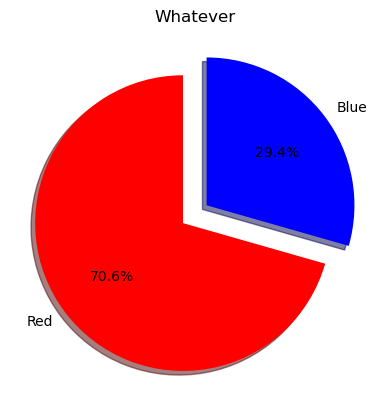

In [29]:
colors = {
    'Blue': 'blue',
    'Red': 'red'
}

explode = [0.1]* len(value_counts)

value_counts.plot.pie(
    autopct='%.1f%%',
    startangle=90,
    colors=[colors[key] for key in value_counts.index],
    explode=explode,
    shadow = True
)

plt.title('Whatever')
plt.ylabel('')

plt.show()